There are n servers numbered from 0 to n - 1 connected by undirected server-to-server connections forming a network where connections[i] = [ai, bi] represents a connection between servers ai and bi. Any server can reach other servers directly or indirectly through the network.

A critical connection is a connection that, if removed, will make some servers unable to reach some other server.

Return all critical connections in the network in any order.

 

Example 1:

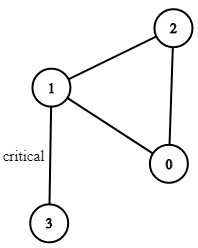

Input: n = 4, connections = [[0,1],[1,2],[2,0],[1,3]]
Output: [[1,3]]
Explanation: [[3,1]] is also accepted.

Example 2:

Input: n = 2, connections = [[0,1]]
Output: [[0,1]]

 

Constraints:

    2 <= n <= 105
    n - 1 <= connections.length <= 105
    0 <= ai, bi <= n - 1
    ai != bi
    There are no repeated connections.



In [68]:
from typing import List
from collections import deque


class Solution:
    def criticalConnections(self, n: int, connections: List[List[int]]) -> List[List[int]]:
        graph = [[0 for _ in range(n)] for _ in range(n)]
        for (i, j) in connections:
            graph[i][j] = 1
            graph[j][i] = 1
            
        q = deque()
            
        for i in range(n):
            for j in range(i + 1, n):
                q.append([i, j, i, []])
                
        tracks = {}
                
        while q:
            start, end, curr, track = q.popleft()
            if curr == end:
                track = track + [curr]
                point = tuple([start, end])
                if point not in tracks:
                    tracks[point] = []
                tracks[point].append(track)
            else:
                for i, val in enumerate(graph[curr]):
                    if (val == 1) and (i not in track):
                        q.append([start, end, i, track + [curr]])
                        
        ans = []
        for key, tracks_list in tracks.items():
            if len(tracks_list) == 1:
                ans.append(tracks_list[0])
                    
        return ans

In [50]:
from collections import defaultdict
from typing import List

class Solution:        
    def __init__(self):        
        self.rank = None
        self.graph = defaultdict(list)
        self.answer = []
        self.inf = 10 ** 6
    
    def dfs(self, node, rank, parent=None):
        if self.rank[node] != self.inf: 
            return self.rank[node]
        
        self.rank[node] = rank
        for adj in self.graph[node]:
            if adj == parent:
                continue
            
            if self.rank[adj] == self.inf:
                self.dfs(adj, rank + 1, node)
            
            self.rank[node] = min(self.rank[node], self.rank[adj])
            
            if self.rank[adj] > rank: 
                # We found a critical edge
                self.answer.append( [node, adj] )
        
        return self.rank[node]
        
    def criticalConnections(self, n: int, connections: List[List[int]]) -> List[List[int]]:  
        
        for u, v in connections: 
            self.graph[u].append(v)
            self.graph[v].append(u)
        
        self.rank = [self.inf for _ in range(n)]
        
        self.dfs(0, 0)
        return self.answer
            

In [43]:
class Solution:
    def criticalConnections(self, n: int, connections: List[List[int]]) -> List[List[int]]:

        graph = [[] for _ in range(n)] # vertex i => [its neighbors]

        currentRank = 0 ## order of DFS level

        lowestRank = [i for i in range(n)] #  lowest order of vertex that can reach this vertex i

        visited = [False for _ in range(n)] # marks whether this node is seen before

        for connection in connections:
            graph[connection[0]].append(connection[1])
            graph[connection[1]].append(connection[0])

        res = []
        prevVertex = -1

        currentVertex = 0 # start the DFS from vertex num 0 (its rank is also 0 of course)
        self._dfs(res, graph, lowestRank, visited, currentRank, prevVertex, currentVertex)
        
        return res

    def _dfs(self, res, graph, lowestRank, visited, currentRank, prevVertex, currentVertex):

        visited[currentVertex] = True 
        lowestRank[currentVertex] = currentRank

        for nextVertex in graph[currentVertex]:
            if nextVertex == prevVertex:
                continue

            if not visited[nextVertex]:
                self._dfs(
                    res, graph, lowestRank, visited, currentRank + 1, currentVertex, nextVertex)
                # We avoid visiting visited nodes here instead of doing it 
                # at the beginning of DFS - the reason is, even that nextVertex 
                # may be visited before, we still need to update my lowestRank 
                # using the visited vertex's information.

            lowestRank[currentVertex] = min(lowestRank[currentVertex], lowestRank[nextVertex]) 
            # take the min of the current vertex's and next vertex's ranking
            if lowestRank[nextVertex] >= currentRank + 1: 
                # if all the neighbors lowest rank is higher than mine + 1, 
                # then it means I am one connecting critical connection
                res.append([currentVertex, nextVertex])

In [ ]:
class Solution:
    def criticalConnections(self, n: int, connections: List[List[int]]) -> List[List[int]]:
    
        graph = defaultdict(list)
        for node1, node2 in connections:
            graph[node1].append(node2)
            graph[node2].append(node1)
            
        arrival_time = [None] * n
        critical_connections = []
        
        def dfs(node = 0, parent = -1, time = 1):
            if arrival_time[node]: 
                return
            
            arrival_time[node] = time
            for neighbour in graph[node]:
                if neighbour == parent: 
                    continue 
                    
                dfs(neighbour, node, time + 1)
                if arrival_time[neighbour] == time + 1: 
                    critical_connections.append((node, neighbour))
                else: 
                    arrival_time[node] = min(arrival_time[node], arrival_time[neighbour])
            return critical_connections
        
        return dfs()

In [69]:
s = Solution()
s.criticalConnections(4, [[0,1],[1,2],[2,0],[1,3]])

[[1, 3]]

In [70]:
s.criticalConnections(2, [[0, 1]])

[[0, 1]]